In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import pandas as pd
import seaborn as sb

In [3]:
a=pd.read_excel('ec.csv')
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
b=a.dropna()

In [5]:
b['Total cost']=b['UnitPrice']*b['Quantity']
b.head()

<ipython-input-5-99b9777082e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Total cost']=b['UnitPrice']*b['Quantity']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
b.describe()

,Quantity,UnitPrice,CustomerID,Total cost
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [7]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Total cost   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [131]:
print('No.of transactions:',b['InvoiceNo'].nunique())
print('No.of products bought:',b['StockCode'].nunique())
print('No.of Customers:',b['CustomerID'].nunique())
print('No.of countries:',b['Country'].nunique())


No.of transactions: 22190
No.of products bought: 3684
No.of Customers: 4372
No.of countries: 37


In [27]:
b.nunique() #types in each column

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
Total cost      4041
dtype: int64

In [26]:
group_by_cust=pd.DataFrame(b.groupby('CustomerID')['InvoiceNo'].nunique())
group_by_cust.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [28]:
group_by_cust.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


In [29]:
group_by_invoice=pd.DataFrame(b.groupby('InvoiceNo')['StockCode'].nunique())
group_by_invoice.columns=['No.of Items per Order']
group_by_invoice.head()

,No.of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [30]:
group_by_invoice.describe()

,No.of Items per Order
count,22190.000000
mean,17.876566
std,22.872614
min,1.000000
25%,3.000000
50%,12.000000
75%,24.000000
max,541.000000


#### The average number of items per order is 17.

In [31]:
group_ID=pd.DataFrame(b.groupby('CustomerID')['StockCode'].nunique())
group_ID.columns=['No.of Items per Customer']
group_ID.head()

,No.of Items per Customer
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17


In [32]:
group_ID.describe()

,No.of Items per Customer
count,4372.000000
mean,61.211116
std,85.425119
min,1.000000
25%,15.000000
50%,35.000000
75%,77.000000
max,1794.000000


#### Average number of items per Customer is 61

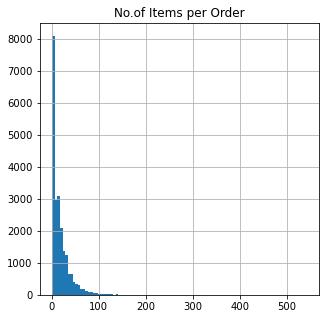

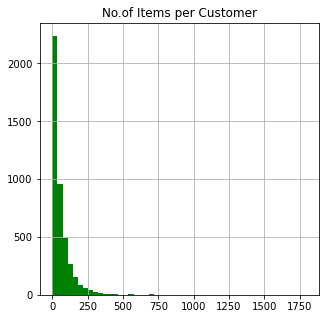

In [36]:
group_by_invoice.hist(bins=100,figsize=(5,5))
group_ID.hist(bins=50,figsize=(5,5),color='green')
plt.show()

Text(0, 0.5, 'Total Cost')

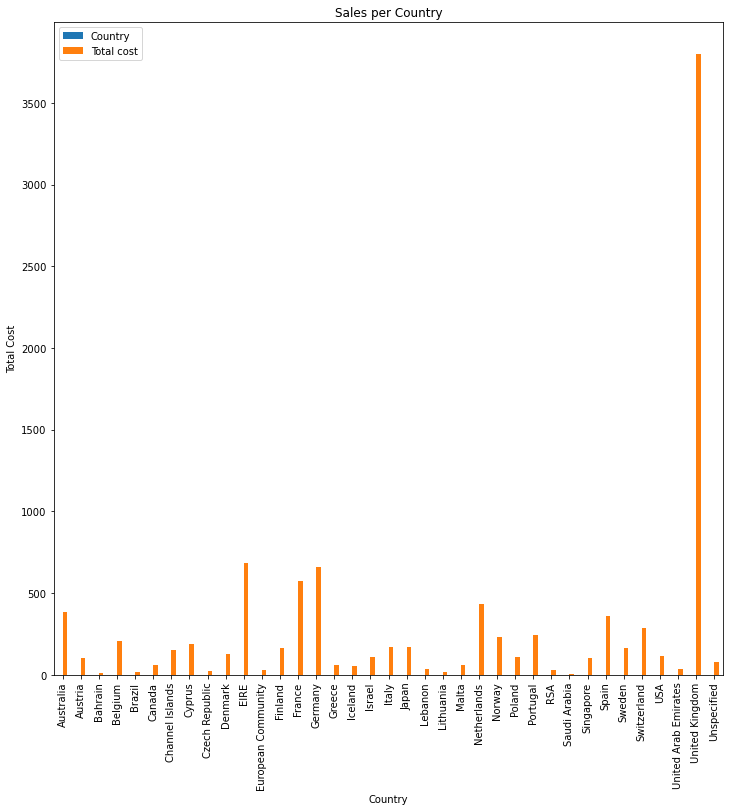

In [19]:
c=b[['Country','Total cost']]
c.groupby('Country').nunique().plot(kind='bar')
plt.title('Sales per Country')
plt.ylabel('Total Cost')

#### From above figure it is clear that UK has high number of sales.

Text(0.5, 1.0, 'No.of Customers per Country')

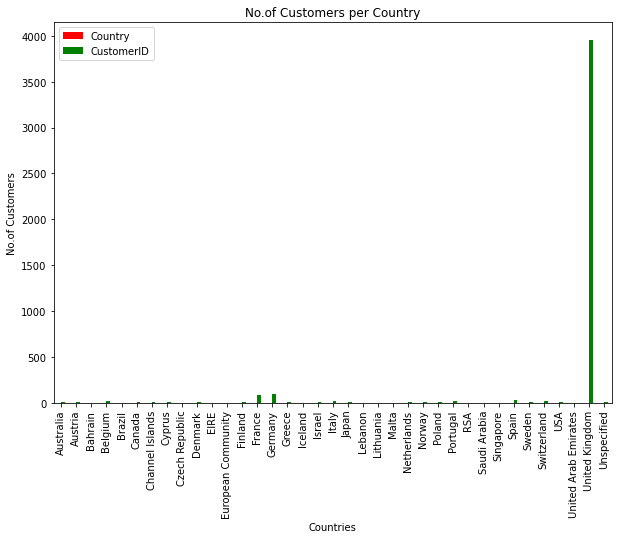

In [40]:
d=b[['Country','CustomerID']]
d.groupby('Country').nunique().plot(kind='bar',color='RG',figsize=(10,7))
plt.ylabel('No.of Customers')
plt.xlabel('Countries')
plt.title('No.of Customers per Country')

#### From above figure it is clear that UK has high number of Customers too.

In [3]:
! pip install wordcloud

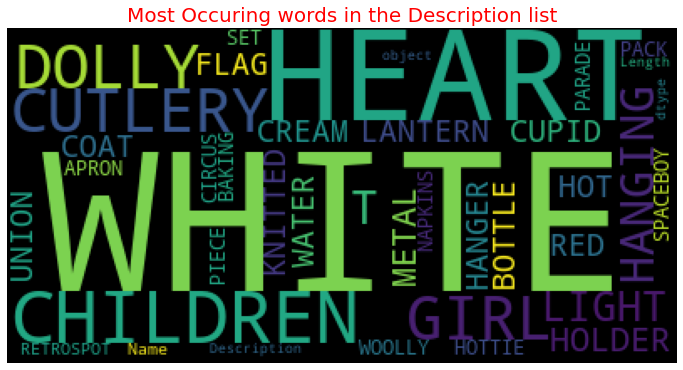

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color='Black').generate(str(b['Description']))
print(wordcloud)
plt.rcParams['figure.figsize']=(12,12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring words in the Description list',fontsize=20,color='red')
plt.show()


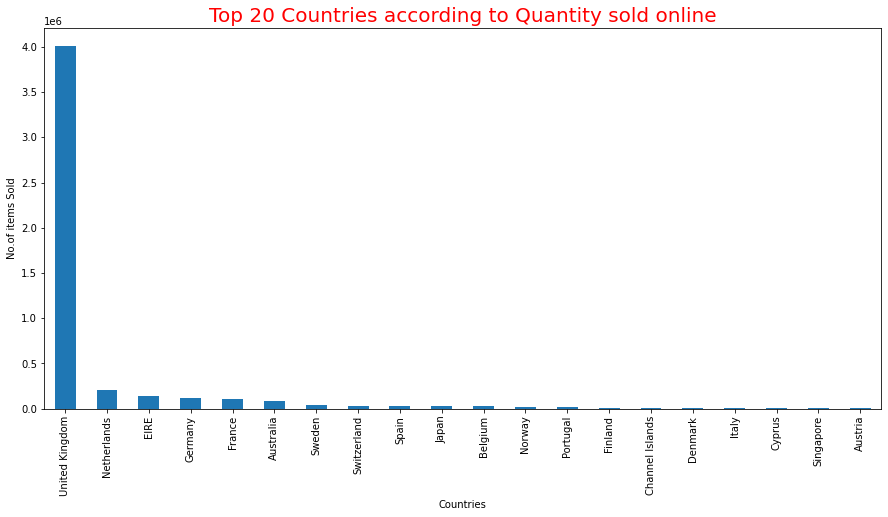

In [43]:
b['Quantity'].groupby(b['Country']).agg('sum').sort_values(ascending=False).head(20).plot.bar(figsize=(15,7))
plt.title('Top 20 Countries according to Quantity sold online',fontsize=20,color='red')
plt.xlabel('Countries')
plt.ylabel('No.of items Sold')
plt.show()

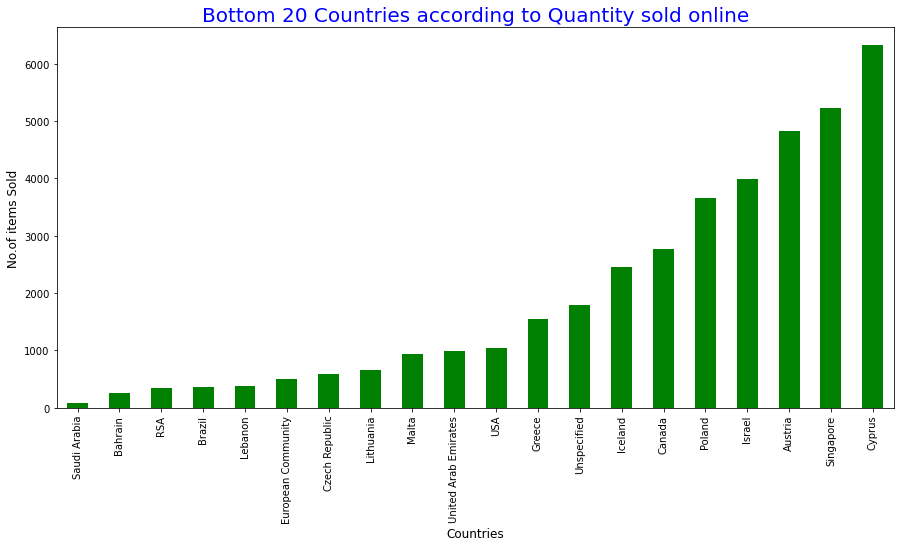

In [22]:
b['Quantity'].groupby(b['Country']).agg('sum').sort_values(ascending=True).head(20).plot.bar(figsize=(15,7),color='green')
plt.title('Bottom 20 Countries according to Quantity sold online',fontsize=20,color='blue')
plt.xlabel('Countries',fontsize=12)
plt.ylabel('No.of items Sold',fontsize=12)
plt.show()

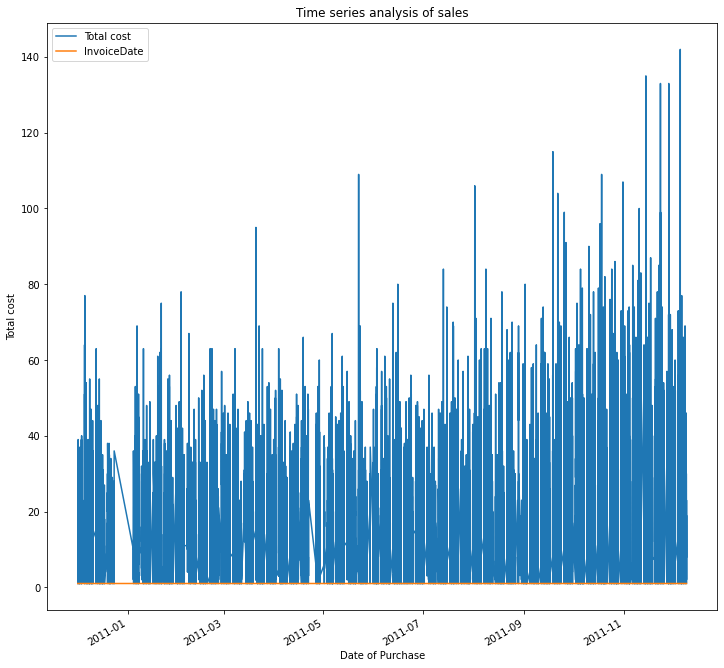

In [23]:
d=b[['Total cost','InvoiceDate',]]
d.groupby('InvoiceDate').nunique().plot()
plt.title('Time series analysis of sales')
plt.xlabel('Date of Purchase')
plt.ylabel('Total cost')
plt.show()

#### From above fig, Sales are high at the end of the year i.e in the month of December compared to other monthly sales.